# Weight optimization in Transformer MCMC

Following the notebook 1 in this folder, we want to optimize the weight assigned to the original function and the transformed estimators.

Since optimization is a complex problem we do not want to tackle for the time being, we will limit ourselves to the case of two free parameters, and we will optimize them by visually insepcting the target function, i.e. the MCMC variance.

In [42]:
 var('x', 'w', 'q')

(x, w, q)

In [43]:
k = 20
rho = exp(-x^2) / sqrt(pi)
g = cos(k*x)

In [44]:
def compute_integral(a, b, rho, g):
    return integrate(rho * g, x, a, b)

In [45]:
def compute_mcmc_variance(a, b, rho, g):
    return (integrate(rho * g^2, x, a, b) - (compute_integral(a, b, rho, g))^2)

In [5]:
def print_mcmc_info(a, b, rho, g):
    print('MCMC Integral: {}'.format(float(compute_integral(a, b, rho, g))))
    print('MCMC Variance: {}'.format(float(compute_mcmc_variance(a, b, rho, g))))

### First transformation

We will start by considering the case of one transformation $t_1$. Our estimator will therefore be a linear combination of the original estimator plus a transformed one, as in the following formula:
$$
w \, g(x) + (1-w) g_{t_1}(x)
$$
where
$$
t_1(x) = x + q_1 \, \frac{\pi}{k}
$$

We want to find the value of $w$ and $q$ that minimize the MCMC variance.

We therefore plot the MCMC variance as a scalar field: dark blue are the lowest values, dark red the highest ones.

In [16]:
t = x + q*pi/k
forget()
assume(q > 0)
twin_sampling_variance_gr0 = compute_mcmc_variance(-oo, oo, rho, w * g + (1-w) * (rho(t) / rho) * g(t))

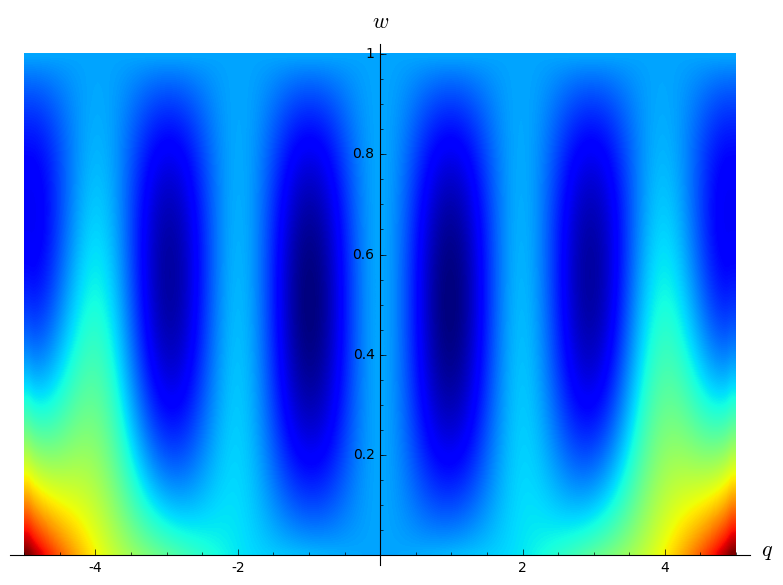

In [49]:
density_plot(twin_sampling_variance_gr0, (q, -5, 5), (w, 0, 1), 
             cmap='jet', plot_points=100,
             axes_labels=[r'$q$', r'$w$'])

From these plots, it appears that the variance is minimized if $w=\frac{1}{2}$ and $q_1=1$ (or $-1$). Let us compute the numbers:

In [15]:
t1 = x + pi/k

In [34]:
print_mcmc_info(-oo, oo, rho, g/2 
                              + rho(t1) / rho * t1.derivative(x) * g(t1) / 2)

MCMC Integral: 3.72007597602e-44
MCMC Variance: 0.00632323926763


We have the same result as in the notebook 1 (as we use the same parameters).

### Second transformation

As next step we want to introduce a second transformation, that will again represent a shift. To limit ourselves to two free parameters, we will leave $q_1=1$, and we will not introduce a second weight, but rather use this formula:
$$
w \, g(x) + \frac{1-w}{2} (g_{t_1}(x) + g_{t_2}(x))
$$

Again, let us plot the MCMC variance in order to identify the values of $w$ and $q_2$ that minimize the variance.

In [18]:
t = x + q*pi/k

forget()
assume(q < 0)
twin_sampling_2_variance_neg = compute_mcmc_variance(-oo, oo, rho, 
                                                     w*g + ((1-w)/2) * ((rho(t1) / rho) * g(t1) + rho(t) / rho * g(t)))
forget()
assume(q > 0)
assume(q < 1)
twin_sampling_2_variance_0_1 = compute_mcmc_variance(-oo, oo, rho, 
                                                     w*g + ((1-w)/2) * ((rho(t1) / rho) * g(t1) + rho(t) / rho * g(t)))
                                                     
forget()
assume(q > 1)
twin_sampling_2_variance_gr1 = compute_mcmc_variance(-oo, oo, rho, 
                                                     w*g + ((1-w)/2) * ((rho(t1) / rho) * g(t1) + rho(t) / rho * g(t)))

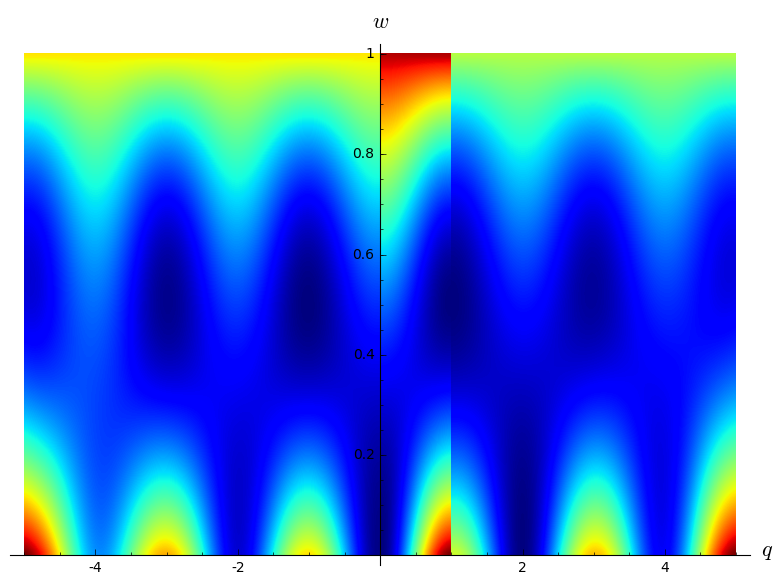

In [51]:
graph = Graphics()
graph += density_plot(twin_sampling_2_variance_neg, (q, -5, 0), (w, 0, 1), 
                      cmap='jet', plot_points=100, axes_labels=[r'$q$', r'$w$'])
graph += density_plot(twin_sampling_2_variance_0_1, (q, 0, 1), (w, 0, 1), 
                      cmap='jet', plot_points=100, axes_labels=[r'$q$', r'$w$'])
graph += density_plot(twin_sampling_2_variance_gr1, (q, 1, 5), (w, 0, 1), 
                      cmap='jet', plot_points=100, axes_labels=[r'$q$', r'$w$'])
graph.show()

The best result can be obtained if we set $w = \frac{1}{2}$ and $q_2 = -1$

In [22]:
t2 = x - pi/k
print_mcmc_info(-oo, oo, rho, g/2 
                              + rho(t1) / rho * t1.derivative(x) * g(t1) / 4
                              + rho(t2) / rho * t2.derivative(x) * g(t2) / 4)

MCMC Integral: 3.72007597602e-44
MCMC Variance: 0.000152232594393


In other words, we have found the same result as in the notebook 1.

# Conclusion

If we consider a linear combination of the original estimator and the transfromed ones, we can achieve superior results. However, this means that we need to optimize more parameters.